In [21]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression


In [22]:
pwd

'C:\\Users\\Bennet\\AI PROJECT_WORK'

In [23]:
cd  AI PROJECT_WORK

[WinError 2] The system cannot find the file specified: 'AI PROJECT_WORK'
C:\Users\Bennet\AI PROJECT_WORK


In [24]:
pd.read_csv("AmesHousing.csv")

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [80]:
 df=pd.read_csv("AmesHousing.csv")

In [81]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [82]:
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [83]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [84]:
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

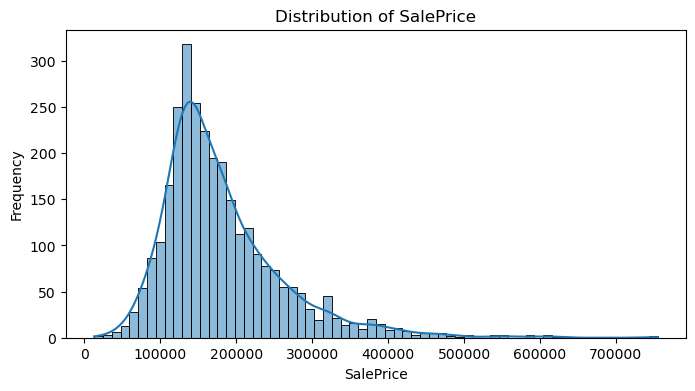

In [85]:

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example plot to check if the warning is suppressed
plt.figure(figsize=(8, 4))
sns.histplot(df_reduced['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

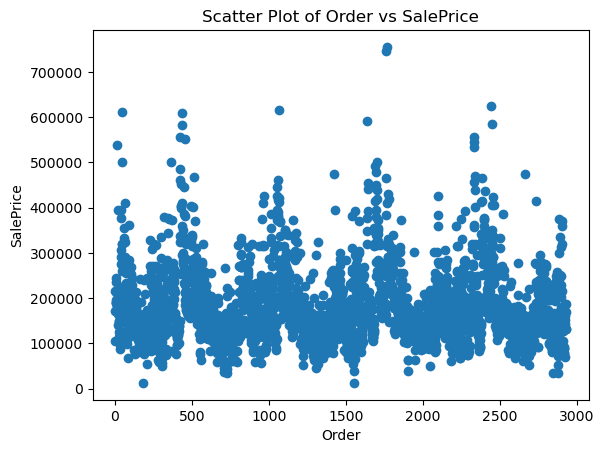

In [86]:
 # Print column names to verify
plt.scatter(df['Order'], df['SalePrice'])  # Use the correct column name
plt.xlabel('Order')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of Order vs SalePrice')
plt.show()


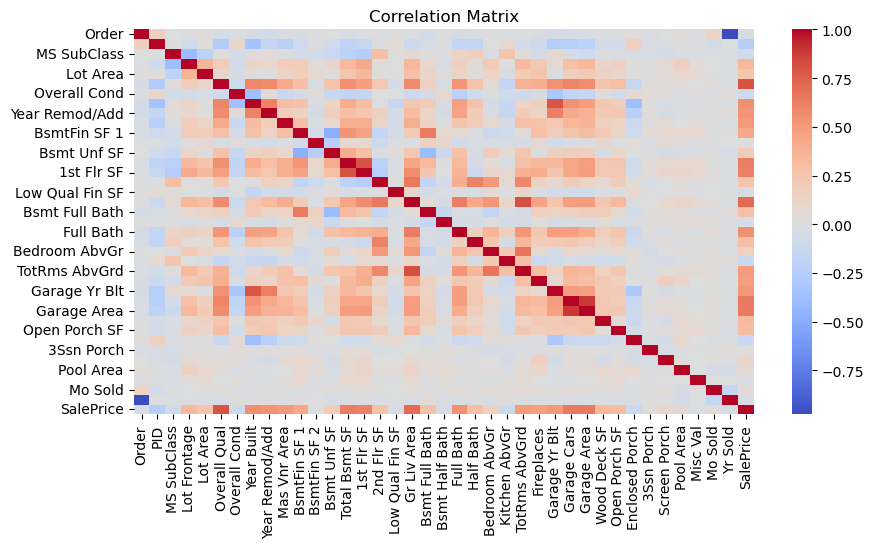

In [87]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Fill missing values with the median value of each column
numeric_df = numeric_df.fillna(numeric_df.median())

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



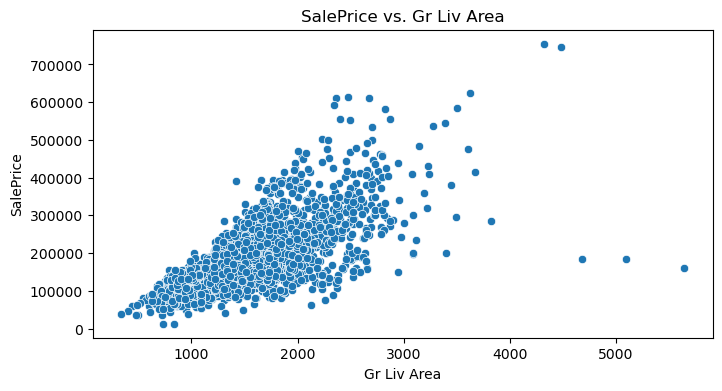

In [42]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('SalePrice vs. Gr Liv Area')
plt.show()


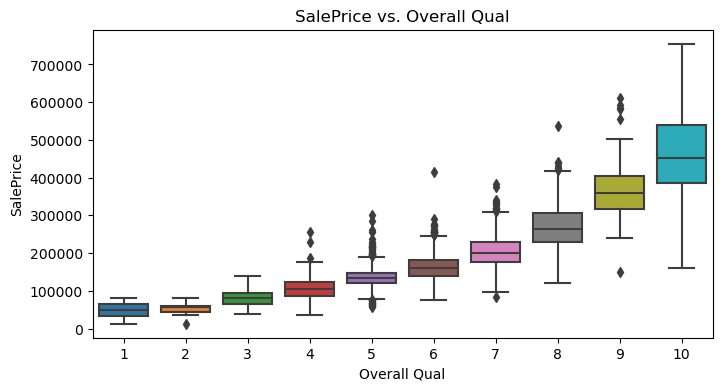

In [43]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(8, 4))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df)
plt.title('SalePrice vs. Overall Qual')
plt.show()

In [44]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_reduced = df.dropna(thresh=threshold, axis=1)

# Check remaining columns with missing values
remaining_missing = df_reduced.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing


Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Cond        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
Garage Area          1
Electrical           1
dtype: int64

In [45]:
# Fill missing values for numerical columns with the median
for col in df_reduced.select_dtypes(include=['number']).columns:
    df_reduced.loc[:, col] = df_reduced[col].fillna(df_reduced[col].median())

# Fill missing values for categorical columns with the mode
for col in df_reduced.select_dtypes(include=['object']).columns:
    df_reduced.loc[:, col] = df_reduced[col].fillna(df_reduced[col].mode()[0])

# Verify that there are no missing values left
remaining_missing_after_imputation = df_reduced.isnull().sum()  
remaining_missing_after_imputation = remaining_missing_after_imputation[remaining_missing_after_imputation >0 ]
print(remaining_missing_after_imputation)

Series([], dtype: int64)


In [46]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [47]:
# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()



,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,False,True,False,False,False,True,False


In [48]:

encoded_file_path = 'Encoded_AmesHousing.csv'  # Update this with the correct path
df_encoded.to_csv(encoded_file_path, index=False)

In [49]:
# Identify numerical columns
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:\n", numerical_columns)

# Apply standardization to the numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the standardized dataframe
df_encoded.head()

# Save the standardized dataframe to a new CSV file
standardized_file_path = 'Standardized_AmesHousing.csv'  # Update this with the correct path
df_encoded.to_csv(standardized_file_path, index=False)

Numerical columns:
 Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')


In [50]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Identify numerical columns
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns


In [51]:
# Apply standardization to the numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Separate the target variable (SalePrice) from the features
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

In [52]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_reduced = df.dropna(thresh=threshold, axis=1)

In [53]:
remaining_missing = df_reduced.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
print(remaining_missing)

Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Cond        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
Garage Area          1
Electrical           1
dtype: int64


In [54]:
# Fill missing values for numerical columns with the median
for col in df_reduced.select_dtypes(include=['number']).columns:
    df_reduced.loc[:, col] = df_reduced[col].fillna(df_reduced[col].median())
    
    # Fill missing values for categorical columns with the mode
for col in df_reduced.select_dtypes(include=['object']).columns:
    df_reduced.loc[:, col] = df_reduced[col].fillna(df_reduced[col].mode()[0])

In [55]:
# Verify that there are no missing values left
remaining_missing_after_imputation = df_reduced.isnull().sum()
remaining_missing_after_imputation = remaining_missing_after_imputation[remaining_missing_after_imputation > 0]
print(remaining_missing_after_imputation)

Series([], dtype: int64)


In [56]:
# Identify categorical columns
categorical_columns = df_reduced.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df_reduced, columns=categorical_columns, drop_first=True)

# Identify numerical columns
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply standardization to the numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Save the standardized dataframe to a new CSV file
standardized_file_path = 'Standardized_AmesHousing.csv'
df_encoded.to_csv(standardized_file_path, index=False)

# Separate the target variable (SalePrice) from the features
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
top_features = importance_df.head(10)
print(top_features)

          Feature  Importance
5    Overall Qual    0.604875
17    Gr Liv Area    0.102539
14     1st Flr SF    0.034611
13  Total Bsmt SF    0.027201
15     2nd Flr SF    0.023719
10   BsmtFin SF 1    0.022180
20      Full Bath    0.016725
4        Lot Area    0.016240
28    Garage Area    0.015769
27    Garage Cars    0.014788


In [58]:
# Select the top 10 most important features
selected_features = top_features['Feature'].tolist()

# Display the DataFrame with selected features
df_selected = df_encoded[selected_features + ['SalePrice']]
df_selected.head()

# Save the DataFrame with selected features to a new CSV file
selected_features_file_path = 'Selected_Features_AmesHousing.csv'
df_selected.to_csv(selected_features_file_path, index=False)

In [59]:
!pip install XGBoost

In [60]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the encoded and standardized data
df_encoded = pd.read_csv('Standardized_AmesHousing.csv')

# Select the top 10 most important features plus SalePrice
selected_features_file_path = 'Selected_Features_AmesHousing.csv'
df_selected = pd.read_csv(selected_features_file_path)

# Separate the target variable (SalePrice) from the features
X = df_selected.drop(columns=['SalePrice'])
y = df_selected['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f"{model.__class__.__name__}:")
    print(f"Training RMSE: {mean_squared_error(y_train, y_pred_train, squared=False)}")
    print(f"Testing RMSE: {mean_squared_error(y_test, y_pred_test, squared=False)}")
    print(f"Training R^2: {r2_score(y_train, y_pred_train)}")
    print(f"Testing R^2: {r2_score(y_test, y_pred_test)}")
    print("-" * 50)

# Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# XGBoost Regression
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)



LinearRegression:
Training RMSE: 0.4400271512444973
Testing RMSE: 0.48396196227145294
Training R^2: 0.7922439275128191
Testing R^2: 0.8136276316322577
--------------------------------------------------
DecisionTreeRegressor:
Training RMSE: 0.003100639816471489
Testing RMSE: 0.4671994415517178
Training R^2: 0.9999896843305761
Testing R^2: 0.8263144468107947
--------------------------------------------------
RandomForestRegressor:
Training RMSE: 0.13534481331808723
Testing RMSE: 0.3760618146352435
Training R^2: 0.9803447753603302
Testing R^2: 0.8874676104476606
--------------------------------------------------
GradientBoostingRegressor:
Training RMSE: 0.25572939234033204
Testing RMSE: 0.3846966429016676
Training R^2: 0.9298292577719908
Testing R^2: 0.8822405254768353
--------------------------------------------------
XGBRegressor:
Training RMSE: 0.07121990301966404
Testing RMSE: 0.3820573362035425
Training R^2: 0.994557511339466
Testing R^2: 0.8838508186977561
--------------------------

In [61]:
!pip install scikit-learn

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a random regression problem
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a random regression problem
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:


# Example with XGBoost Regression
xgb_model = XGBRegressor(random_state=42)
xgb_metrics = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)


XGBRegressor:
Training RMSE: 0.00047065222169994167
Testing RMSE: 104.61912194492157
Training R^2: 0.9999999999930302
Testing R^2: 0.33477901394185594
--------------------------------------------------


In [65]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv_folds=5):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Calculate metrics for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"Training set metrics:")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")
    print(f"R^2 Score: {r2_train}")
    
    print("\nTest set metrics:")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"R^2 Score: {r2_test}")

    # Perform cross-validation
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_rmse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    cv_mae_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    
    print("\nCross-validation metrics:")
    print(f"RMSE: {-np.mean(cv_rmse_scores)} (+/- {np.std(cv_rmse_scores)})")
    print(f"MAE: {-np.mean(cv_mae_scores)} (+/- {np.std(cv_mae_scores)})")
    print(f"R^2 Score: {np.mean(cv_r2_scores)} (+/- {np.std(cv_r2_scores)})")
    
    return {
        "rmse_train": rmse_train,
        "mae_train": mae_train,
        "r2_train": r2_train,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        "r2_test": r2_test,
        "cv_rmse_mean": -np.mean(cv_rmse_scores),
        "cv_rmse_std": np.std(cv_rmse_scores),
        "cv_mae_mean": -np.mean(cv_mae_scores),
        "cv_mae_std": np.std(cv_mae_scores),
        "cv_r2_mean": np.mean(cv_r2_scores),
        "cv_r2_std": np.std(cv_r2_scores),
    }


In [66]:
# Generate a random regression problem
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Example with Lasso Regression
lasso_model = Lasso(random_state=42)
lasso_metrics = evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

# Example with XGBoost Regression
xgb_model = XGBRegressor(random_state=42)
xgb_metrics = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Print metrics for comparison
print("Lasso Regression Metrics:")
print(lasso_metrics)

print("\nXGBoost Regression Metrics:")
print(xgb_metrics)


Training set metrics:
RMSE: 3.317478165887205
MAE: 2.7578759207045356
R^2 Score: 0.9996537124931364

Test set metrics:
RMSE: 3.195632055564969
MAE: 2.688340930097737
R^2 Score: 0.9993793348822765

Cross-validation metrics:
RMSE: 4.010248653223467 (+/- 0.6547292667521755)
MAE: 3.3752269659799383 (+/- 0.539406342340989)
R^2 Score: 0.9994272599102466 (+/- 0.0002497415973117558)
Training set metrics:
RMSE: 0.00047065222169994167
MAE: 0.0003407340880874438
R^2 Score: 0.9999999999930302

Test set metrics:
RMSE: 104.61912194492157
MAE: 93.09415638646664
R^2 Score: 0.33477901394185594

Cross-validation metrics:
RMSE: 114.43743169776914 (+/- 24.664962356356806)
MAE: 92.40842299394453 (+/- 20.64241722478385)
R^2 Score: 0.5286112439313368 (+/- 0.25735046937872297)
Lasso Regression Metrics:
{'rmse_train': 3.317478165887205, 'mae_train': 2.7578759207045356, 'r2_train': 0.9996537124931364, 'rmse_test': 3.195632055564969, 'mae_test': 2.688340930097737, 'r2_test': 0.9993793348822765, 'cv_rmse_mean': 4

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Example values for Lasso's alpha parameter
}
# Create a Lasso model
lasso = Lasso(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")


Best Parameters: {'alpha': 0.01}
Best Score: 0.10923982656926157


In [69]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting trees
}
# Create an XGBRegressor model
xgb = XGBRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 90.04136387833142


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from scipy.stats import uniform
# Define the parameter distribution
param_dist = {
    'alpha': uniform(loc=0.01, scale=100)  # Randomly sample alpha values
}
# Create a Lasso model
lasso = Lasso(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_dist, n_iter=10, scoring='neg_root_mean_squared_error', cv=5, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_}")


Best Parameters: {'alpha': 5.818361216819946}
Best Score: 23.14106176849773


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),  # Randomly sample n_estimators
    'learning_rate': uniform(0.01, 0.2),  # Randomly sample learning_rate
    'max_depth': randint(3, 10),  # Randomly sample max_depth
    'subsample': uniform(0.7, 0.3)  # Randomly sample subsample
}


In [73]:
# Create an XGBRegressor model
xgb = XGBRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=10, scoring='neg_root_mean_squared_error', cv=5, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_}")


Best Parameters: {'learning_rate': 0.13349630192554332, 'max_depth': 4, 'n_estimators': 121, 'subsample': 0.7021198915659151}
Best Score: 95.50956475483767


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = xgb_model.feature_importances_
# Define feature names manually if you don't have them
feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame for plotting
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)



# Display top features
print(importances_df.head(10))


       Feature  Importance
7    Feature_7    0.279952
8    Feature_8    0.240319
1    Feature_1    0.192401
9    Feature_9    0.040291
4    Feature_4    0.031751
11  Feature_11    0.031567
13  Feature_13    0.028758
2    Feature_2    0.025592
6    Feature_6    0.024391
15  Feature_15    0.023386


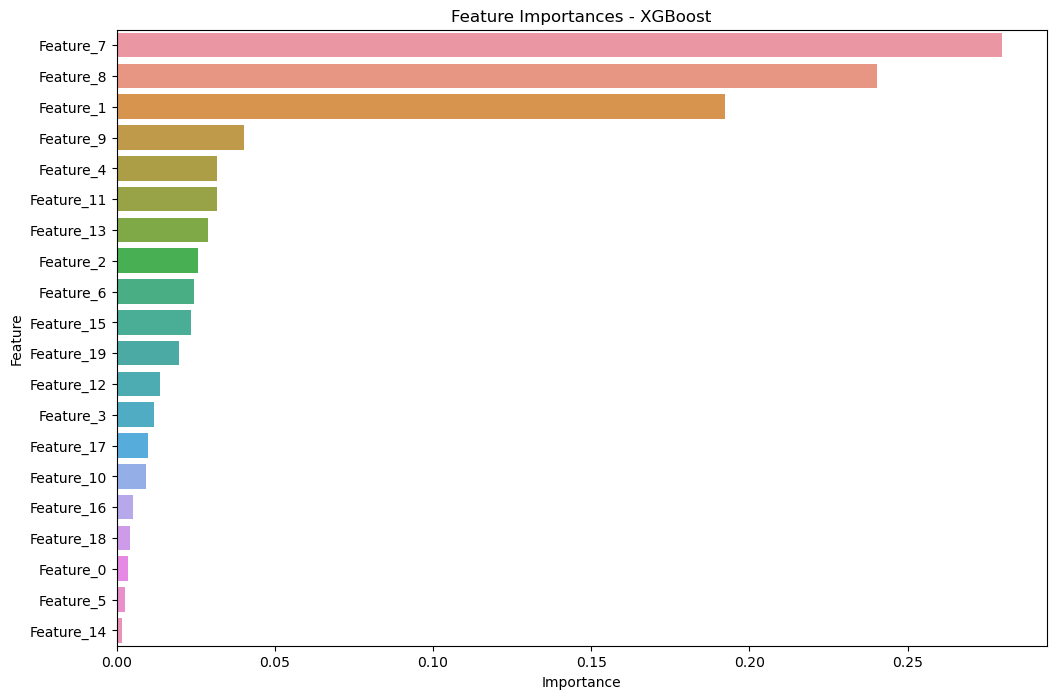

In [75]:
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances - XGBoost')
plt.show()


In [76]:

# Generate a sample dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Lasso model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Extract coefficients
lasso_coefficients = lasso_model.coef_

# Define feature names manually if you don't have them
feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Create a DataFrame for plotting
lasso_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display top features
print(lasso_importances_df.head(10))



       Feature  Coefficient
7    Feature_7    95.408291
1    Feature_1    94.691242
8    Feature_8    80.681634
19  Feature_19    52.191511
2    Feature_2    40.566821
9    Feature_9    34.813711
15  Feature_15    29.846297
6    Feature_6    10.972144
16  Feature_16     7.116297
0    Feature_0     6.448799


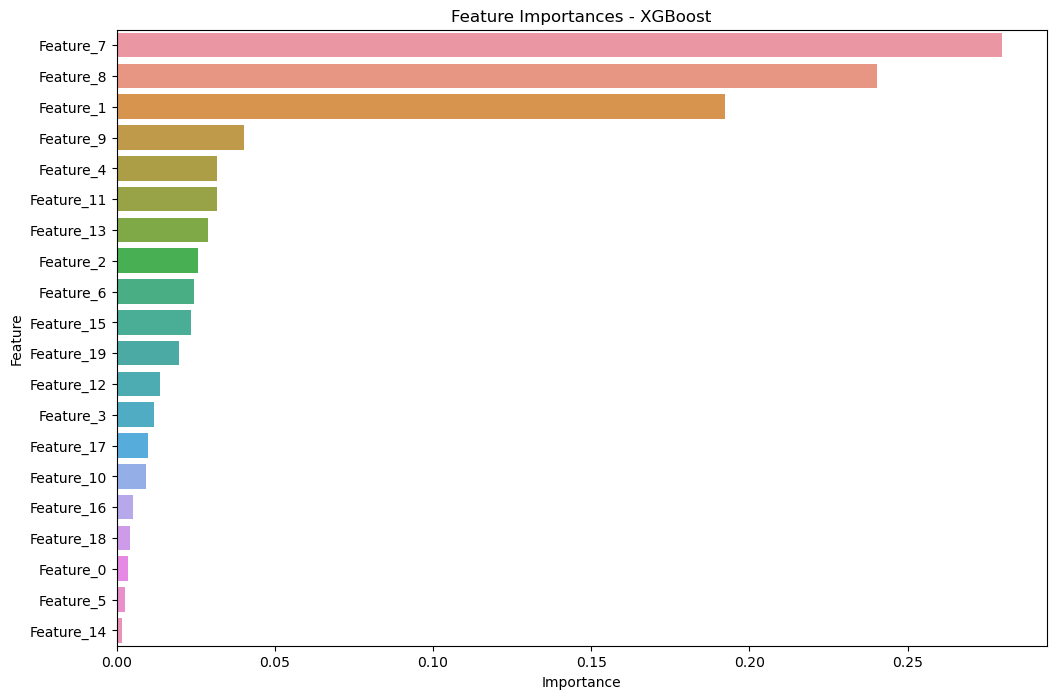

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [79]:

housing_data =pd.read_csv("AmesHousing.csv")

# Drop rows with missing target value
housing_data = housing_data.dropna(subset=['SalePrice'])

# Separate features and target variable
X = housing_data.drop(columns=['SalePrice'])
y = housing_data['SalePrice']

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing for categorical data
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Create and fit the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R2']}")
    print()

Model: Linear Regression
Mean Absolute Error: 29685.15417133268
Mean Squared Error: 2112266384.8901417
R-squared: 0.7365445890572946

Model: Random Forest
Mean Absolute Error: 15977.86196245734
Mean Squared Error: 707317345.1691883
R-squared: 0.9117788441971802

Model: Gradient Boosting
Mean Absolute Error: 15243.596848036725
Mean Squared Error: 666081972.994116
R-squared: 0.916921984285699

